# Problem 3

Atahan Özer - 6317973\
Karahan Sarıtaş - 6661689

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bed_reader import open_bed, sample_file

In [ ]:
! ./plink --bfile plink --model-trend --out a1 --adjust

PLINK v1.90b7.1 64-bit (18 Oct 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to a1.log.
Options in effect:
  --adjust
  --bfile plink
  --model-trend
  --out a1

Note: --model-trend flag deprecated.  Use "--model trend".
16167 MB RAM detected; reserving 8083 MB for main workspace.
1440616 variants loaded from .bim file.
619 people (305 males, 314 females) loaded from .fam.
619 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 523 founders and 96 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.99772.
1440616 variants and 619 people pass filters and QC.
Among remaining phenotypes, 119 are cases and 500 are controls.

these as missing.


In [ ]:
def qqplot(P,label):
    expected = -np.log10(np.arange(1, len(P) + 1) / len(P)) # under unifrom dist. assumption
    observed = -np.log10(np.sort(P))
    # Create a QQ plot
    plt.figure(figsize=(5, 5))
    plt.plot([min(expected), max(expected)], [min(expected), max(expected)], color='red', linestyle='--', label = "Expected")
    plt.plot(expected, observed,  label = label)
    plt.title("QQ Plot")
    plt.xlabel("Expected -log10(p)")
    plt.ylabel("Observed -log10(p)")
    plt.legend()
    plt.show()

### Part I

In [ ]:
def_df = pd.read_csv("a1.model", delimiter=r"\s+")
def_df.describe()

,CHR,CHISQ,DF,P
count,7.202520e+06,5.319694e+06,5.319694e+06,5.319694e+06
mean,9.249959e+00,3.892091e+00,1.153433e+00,3.048646e-01
std,6.289478e+00,5.247371e+00,3.604039e-01,3.057416e-01
min,1.000000e+00,0.000000e+00,1.000000e+00,1.053000e-19
25%,4.000000e+00,4.639000e-01,1.000000e+00,2.783000e-02
50%,8.000000e+00,1.916000e+00,1.000000e+00,1.955000e-01
75%,1.400000e+01,5.214000e+00,1.000000e+00,5.374000e-01
max,2.500000e+01,8.251000e+01,2.000000e+00,1.000000e+00


In [ ]:
# drop missing values for P
def_df = def_df.dropna(subset=['P'])
P = def_df['P']

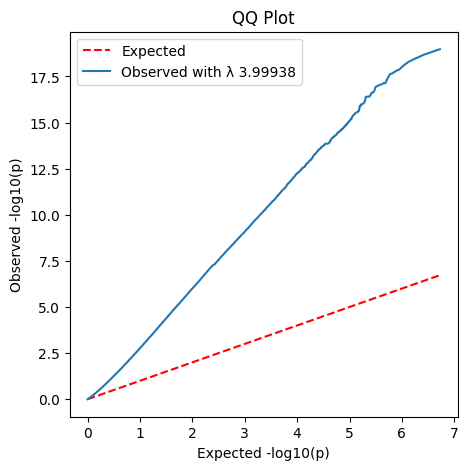

In [ ]:
qqplot(P,label="Observed with λ 3.99938")

The lambda value is not within the calibration range, and we can see the deviation between the expected and observed values from the QQ plot. In the following part, we will calibrate the test statistics using genomic control.

### Part II

In [ ]:
adj_df= pd.read_csv("a1.model.trend.adjusted", delimiter=r"\s+")
adj_df.describe()

,CHR,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY
count,1.440504e+06,1.440504e+06,1.440504e+06,1.440504e+06,1.440504e+06,1.440504e+06,1.440504e+06,1.440504e+06,1.440504e+06
mean,9.249959e+00,2.952593e-01,5.021236e-01,9.935852e-01,9.935696e-01,9.923285e-01,9.923059e-01,4.052908e-01,8.547188e-01
std,6.289480e+00,3.059926e-01,2.859013e-01,7.364012e-02,7.371598e-02,7.739700e-02,7.748819e-02,3.246262e-01,3.101131e-01
min,1.000000e+00,2.168000e-15,7.309000e-05,3.123000e-09,3.123000e-09,3.123000e-09,3.123000e-09,1.610000e-09,2.376000e-08
25%,4.000000e+00,2.307000e-02,2.559000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.229000e-02,1.000000e+00
50%,8.000000e+00,1.769000e-01,4.995000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.537000e-01,1.000000e+00
75%,1.400000e+01,5.236000e-01,7.498000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.981000e-01,1.000000e+00
max,2.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
adj_df = adj_df.dropna(subset=['GC'])
P_adj = adj_df['GC']

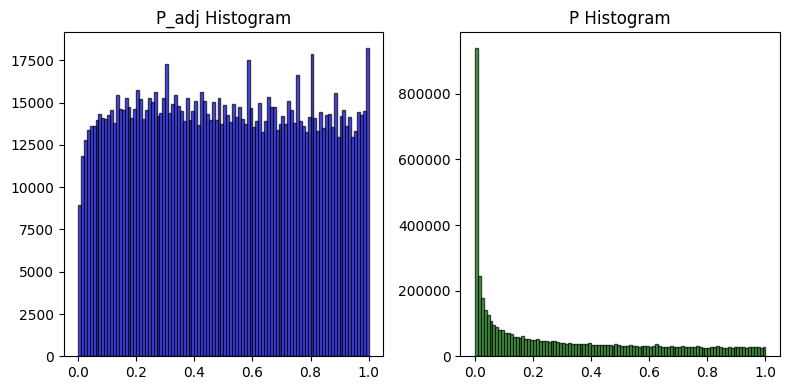

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.hist(P_adj, bins=100, color='blue', alpha=0.7, edgecolor='k')
ax1.set_title('P_adj Histogram')

ax2.hist(P, bins=100, color='green', alpha=0.7, edgecolor='k')
ax2.set_title('P Histogram')

plt.tight_layout()
plt.show()

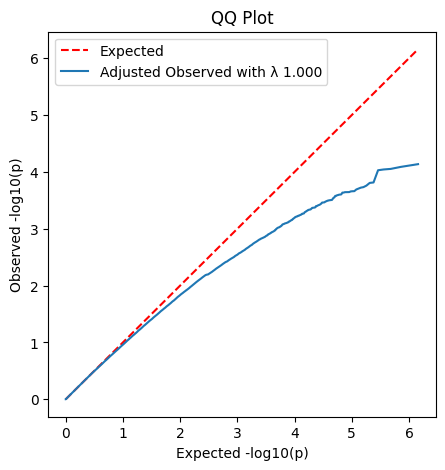

In [ ]:
qqplot(P_adj,label="Adjusted Observed with λ 1.000")

As it can be seen from the QQ Plot above, with the adjustment, the distribution of p-values became closer to uniform.

### Part III

In [ ]:
P_bonf = adj_df['BONF']

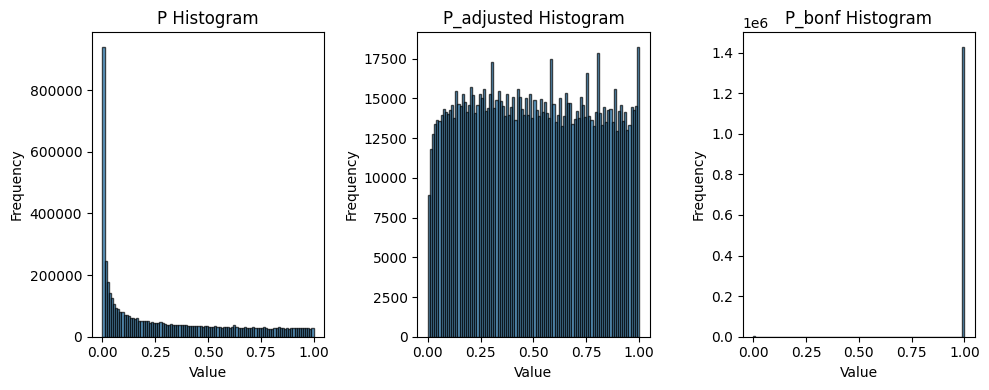

In [ ]:
data = {
    'P': P,
    'P_adjusted': P_adj,
    'P_bonf': P_bonf
}

# Create a figure with subplots
fig, axes = plt.subplots(1, len(data), figsize=(10, 4))  # 1 row, len(data) columns
# Iterate through the data and plot histograms for each variable
for i, (label, values) in enumerate(data.items()):
    ax = axes[i]
    ax.hist(values, bins=100, alpha=0.7, edgecolor='k')
    ax.set_title(f'{label} Histogram')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show or save the plot
plt.show()

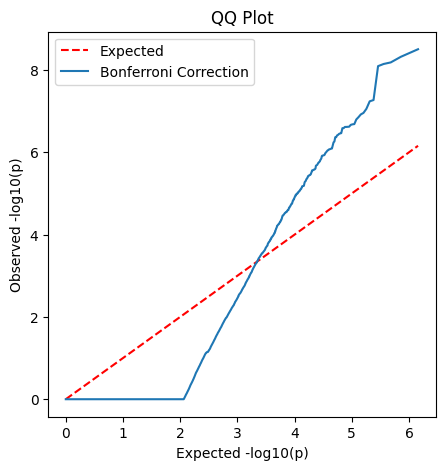

In [ ]:
qqplot(P_bonf,label="Bonferroni Correction")

Lambda exceeds 3, indicating that a significant portion of the dataset is more significant than anticipated. Consequently, all P-values are pushed towards a point significantly distant from the significance level.

### Part IV

In [ ]:
bed = open_bed('plink.bed')

In [ ]:
# taken from https://nbviewer.org/github/fastlmm/FaST-LMM/blob/master/doc/ipynb/FaST-LMM.ipynb
from pysnptools.snpreader import Bed
from fastlmm.util import compute_auto_pcs

bed_fn = 'plink.bed'
snp_reader = Bed(bed_fn, count_A1=True)
pcs = compute_auto_pcs(bed_fn,count_A1=True)

In [ ]:
print("selected number of PCs:", pcs["vals"].shape[1])

selected number of PCs: 10


In [ ]:
fam_file = "plink.fam"
output_file = "pheno.txt"

phenotype_data = []

with open(fam_file, 'r') as fam:
    for line in fam:
        parts = line.strip().split()
        if len(parts) >= 6:
            fam_id, ind_id, pat_id, mat_id, sex, phenotype = parts[0], parts[1], parts[2], parts[3], parts[4], parts[-1]
            phenotype_line = f"{fam_id} {ind_id} {phenotype}"
            phenotype_data.append(phenotype_line)

with open(output_file, 'w') as output:
    for line in phenotype_data:
        output.write(f"{line}\n")

print(f"Phenotype data has been written to {output_file}")

In [ ]:
test_snps = snp_reader[:,snp_reader.pos[:,0] == 5]
results_df = single_snp_select(test_snps=test_snps, G=snp_reader, covar=pcs, GB_goal=2, pheno="pheno.txt")

In [ ]:
# save results on disk
results_df.to_csv("results.csv")

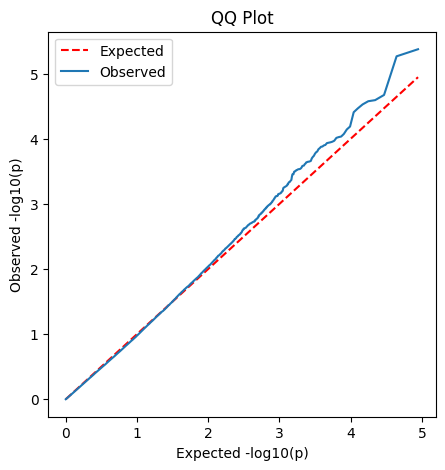

In [ ]:
qqplot(results_df['PValue'], label="Observed")

By applying FaST-LMM's p-value correction, we achieved improved results, which can be observed in the provided QQ plot. In Part I, all values are significant, while in Part II, nothing is significant. In Part III, the results are better than previous attempts, although the p-values are either too high or too low compared to Part IV.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/MDS/hw1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/MDS/hw1.ipynb to html
[NbConvertApp] Writing 850674 bytes to /content/drive/MyDrive/MDS/hw1.html
